## Proyecto ciencia de datos: Impacto de la IA en los trabajos

Nuestro proyecto tiene como objetivo principal analizar el impacto de la inteligencia artificial (IA)
en el ámbito laboral, explorando sus efectos en diversos sectores y niveles organizacionales.

### Datos Utilizados para los analisis
- `IA_impact_on_jobs.csv`: Impacto de IA en diferentes roles laborales
- `artificial-intelligence-granted-patents-by-industry.csv`: Patentes por sector industrial de IA
- `corporate-investment-in-artificial-intelligence-by-type.csv`: Inversión corporativa global en IA
- `newly-funded-artificial-intelligence-companies.csv`: Nuevas empresas de IA fundadas
- `tech_layoffs_COMPLETO.xlsx`: Datos sobre despidos en empresas 2020-2024
- `isoc_eb_ai$defaultview_spreadsheet.xlsx`: Adopción de IA en empresas europeas

*Se mostraran las respuestas a las preguntas seleccionadas para los analisis*

In [1]:
# Importaciones
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import os

-------------------------------------------------------

#### **Pregunta 1:**
¿Qué sectores laborales han experimentado el mayor impacto en términos de despidos debido a la implementación de la IA, y cómo se compara esto con los sectores que han mostrado mayor resistencia al cambio?

In [2]:
path = os.path.join('data','tech_layoffs_COMPLETO.csv')
df = pd.read_csv(path)

In [3]:
# limpieza del df

# Eliminar filas donde 'Percentage' tenga valores nulos
df = df.dropna(subset=['Laid_Off'])
# Eliminar filas donde 'Percentage' tenga valores nulos
df = df.dropna(subset=['Percentage'])
# Reemplazar las comas por puntos en la columna 'Percentage' para convertirla en formato numérico
df['Percentage'] = df['Percentage'].str.replace(',','.').astype(float)

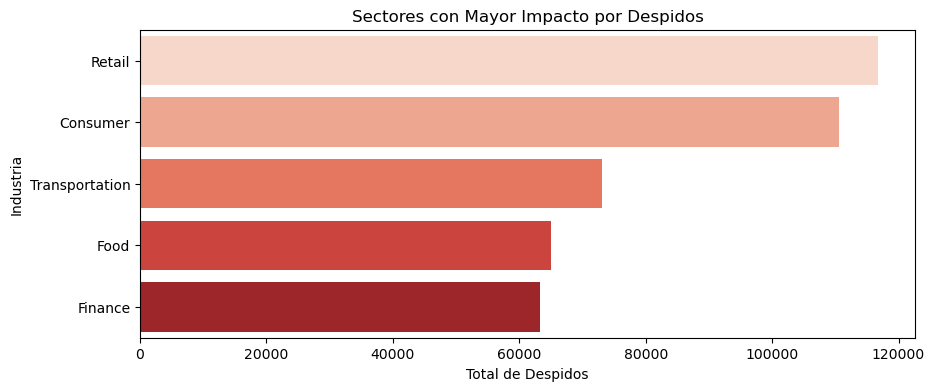

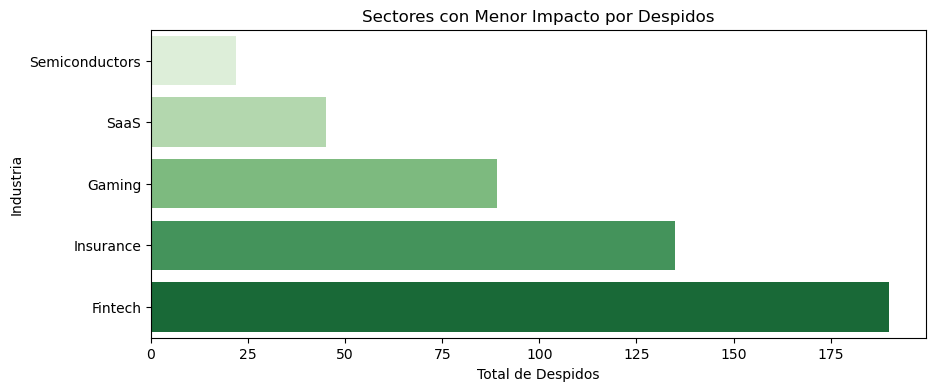

In [4]:
# Cargar las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Agrupar por industria y calcular estadísticas clave
sector_summary = df.groupby('Industry').agg(
    total_despidos=('Laid_Off', 'sum'),
    porcentaje_medio=('Percentage', 'mean')
).reset_index()


# Filtrar para eliminar el sector "Other"
sector_summary = sector_summary[sector_summary['Industry'] != 'Other']

# Identificar sectores más afectados y más resistentes
sectores_mas_afectados = sector_summary.nlargest(5, 'total_despidos')
sectores_mas_resistentes = sector_summary.nsmallest(5, 'total_despidos')

# Visualización de los resultados

# Sectores más afectados
plt.figure(figsize=(10, 4))
sns.barplot(data=sectores_mas_afectados, x='total_despidos', y='Industry', hue='Industry', dodge=False, palette='Reds', legend=False)
plt.title('Sectores con Mayor Impacto por Despidos')
plt.xlabel('Total de Despidos')
plt.ylabel('Industria')
plt.legend([],[], frameon=False)  # Elimina leyendas redundantes
plt.show()

# Sectores más resistentes
plt.figure(figsize=(10, 4))
sns.barplot(data=sectores_mas_resistentes, x='total_despidos', y='Industry', hue='Industry', dodge=False, palette='Greens', legend=False)
plt.title('Sectores con Menor Impacto por Despidos')
plt.xlabel('Total de Despidos')
plt.ylabel('Industria')
plt.legend([],[], frameon=False)  # Elimina leyendas redundantes
plt.show()


#### Sectores con mayor impacto
Los sectores más afectados por los despidos debido a la implementación de la IA, según el gráfico, son:
- **Retail**: La automatización de procesos en tiendas físicas y la optimización de cadenas de suministro han llevado a una reducción significativa de la fuerza laboral.
- **Consumer**: Este sector enfrenta una transformación hacia modelos de negocio basados en datos y servicios automatizados.
- **Transportation**: El desarrollo de vehículos autónomos y sistemas de logística inteligente ha reducido la necesidad de trabajadores humanos.
- **Food**: Las cocinas automatizadas y sistemas de gestión digital han impactado en el empleo tradicional en restaurantes y producción alimentaria.
- **Finance**: Este sector, tradicionalmente intensivo en datos, ha adoptado soluciones de IA como chatbots, análisis predictivo y detección de fraudes. Esto ha llevado a una reducción de trabajos en roles más básicos.

#### Sectores con menor impacto
- **Semiconductor**: Este sector es un motor clave para la IA, ya que fabrica componentes esenciales. Su bajo nivel de despidos podría explicarse por la alta demanda de talento técnico especializado.
- **SaaS (Software as a Service)**: Este modelo empresarial es parte del ecosistema de la IA, por lo que enfrenta un menor impacto negativo en su fuerza laboral.
- **Gaming**: Aunque la IA juega un papel importante en la creación de videojuegos, el impacto en términos de despidos parece limitado, ya que se requieren equipos creativos y técnicos especializados.
- **Insurance**: La IA ayuda a optimizar procesos, pero no ha sustituido completamente la toma de decisiones humanas en sectores críticos.
- **Fintech**: Este sector está más enfocado en el uso de la IA para innovación que en la reducción de la fuerza laboral.

#### Reflexión y proyección futura
- **Adopción tecnológica**: Los sectores con mayor impacto tienden a estar asociados con tareas repetitivas y automatizables, mientras que los sectores menos afectados requieren habilidades técnicas y especializadas que la IA no puede replicar fácilmente.
- **Evolución del impacto**: A medida que la tecnología avanza, los sectores actualmente resilientes podrían experimentar cambios significativos, especialmente si las capacidades de la IA continúan expandiéndose.
- **Implicaciones sociales y económicas**: Los despidos masivos en ciertos sectores resaltan la necesidad de programas de reconversión laboral y de un enfoque ético en la implementación de IA.

----------------------------------------

#### **Pregunta 2:**

¿Cómo ha evolucionado la demanda de habilidades en el mercado laboral desde la
introducción generalizada de la IA, y qué nuevas competencias han surgido como las
más valoradas?

Usaremos los dataset **tech_layoffs** y **IA_impact_on_jobs**, dado que no logramos dar con un dataset que posea datos referente a contratos, analizaremos el data set de despidos (tech_layoffs) de manera que las industrias con menos despidos a lo largo del tiempo seran las que estan siendo mas demandadas recurrentemente

El data set **tech_layoffs** trata sobre reportes de despidos de empresas desde 2020 a 2024, cada empresa posee una industria para poder identificar el tipo de empresa de forma mas general. Este dataset posee columnas de porcentaje de el reporte de despidos, se usara para conocer las industrias que reducen estos numeros porcentuales con el tiempo. El data set **IA_impact_on_jobs** no requeriremos de trabajarlo mucho dado que posee en orden distintos tipos de industrias y su porcentaje de influenciabilidad con las inteligencias artificiales

In [10]:
df_IA_impact = pd.read_csv(os.path.join("data","IA_impact_on_jobs.csv")).head(10) #guardamos solo los 10 primeros

df_layoffs = pd.read_csv(os.path.join("data","tech_layoffs_Q2_2024.csv"))
#lectura del data set data\tech_layoffs.xlsx
df_layoffs2 = pd.read_excel(os.path.join("data","tech_layoffs.xlsx"))

#juntamos los dos dataframes
df_layoffs = pd.concat([df_layoffs,df_layoffs2])
df_layoffs = df_layoffs.reset_index(drop=True)

In [11]:
# limpieza de df_layoffs

#se eliminan filas que tengan la columna Laid_Offs en NaN
df_layoffs = df_layoffs.dropna(subset=['Laid_Off'])
#se eliminan las filas que tengan la columna INdustry en NaN
df_layoffs = df_layoffs.dropna(subset=['Industry'])
#se eliminan las filas que tengan la columna Percentage en NaN
df_layoffs = df_layoffs.dropna(subset=['Percentage'])
#la columna Percentaje esta en formato object como "xx,x", lo pasamos a float eliminando la coma
df_layoffs['Percentage'] = df_layoffs['Percentage'].str.replace(',','.').astype(float)

# las columnas limpiadas son las esenciales para el analisis
df_layoffs

,#,Company,Location_HQ,Region,State,Country,Continent,Laid_Off,Date_layoffs,Percentage,...,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in__mil,Year,latitude,longitude,Money_Raised_in_$_mil,lat,lng
0,1,Tamara Mellon,Los Angeles,NaN,California,USA,North America,20.0,2020-03-12,40.0,...,30,Retail,Series C,90.0,2020,34.053691,-118.242766,NaN,NaN,NaN
1,2,HopSkipDrive,Los Angeles,NaN,California,USA,North America,8.0,2020-03-13,10.0,...,72,Transportation,Unknown,45.0,2020,34.053691,-118.242766,NaN,NaN,NaN
2,3,Panda Squad,San Francisco,San Francisco Bay Area,California,USA,North America,6.0,2020-03-13,75.0,...,2,Consumer,Seed,1.0,2020,37.779259,-122.419329,NaN,NaN,NaN
3,4,Help.com,Austin,NaN,NaN,USA,North America,16.0,2020-03-16,100.0,...,0,Support,Seed,6.0,2020,30.271129,-97.743700,NaN,NaN,NaN
4,5,Inspirato,Denver,NaN,NaN,USA,North America,130.0,2020-03-16,22.0,...,461,Travel,Series C,79.0,2020,39.739236,-104.984862,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,3511,Udaan,Bengaluru,NaN,NaN,India,Asia,100.0,2023-12-18 00:00:00,NaN,...,900.0,Retail,Unknown,NaN,2024,NaN,NaN,"$1,500",12.97194,77.59369
3492,3519,Cruise,San Francisco Bay Area,NaN,NaN,USA,North America,900.0,2023-12-14 00:00:00,NaN,...,2850.0,Transport…,Acquired,NaN,2024,NaN,NaN,"$15,000",37.77493,-122.41942
3499,3526,Invitae,San Francisco Bay Area,NaN,NaN,USA,North America,235.0,2023-12-13 00:00:00,NaN,...,1331.0,Healthcare,Post-IPO,NaN,2024,NaN,NaN,"$2,500",37.77493,-122.41942
3500,3527,Etsy,New York City,NaN,NaN,USA,North America,225.0,2023-12-13 00:00:00,NaN,...,1820.0,Retail,Post-IPO,NaN,2024,NaN,NaN,$97,40.71427,-74.00597


In [12]:
# Usaremos la columna Industry y percentaje para el analisis, inicialmente haremos un diccionario donde almacenaremos
# el promedio de Percentaje de despidos por industria
# para hacerlo con mas sentido, crearemos antes un dataframe para cada anio (2020, 2021, 2022, 2023, 2024)

df_layoffs_2020 = df_layoffs[df_layoffs['Year'] == 2020]
df_layoffs_2021 = df_layoffs[df_layoffs['Year'] == 2021]
df_layoffs_2022 = df_layoffs[df_layoffs['Year'] == 2022]
df_layoffs_2023 = df_layoffs[df_layoffs['Year'] == 2023]
df_layoffs_2024 = df_layoffs[df_layoffs['Year'] == 2024]

# ahora creare una funcion para crear un diccionario que contenga el promedio de despidos por industria
def promedio_despidos(df):
    promedio = {}
    for industry in df['Industry'].unique():
        promedio[industry] = df[df['Industry'] == industry]['Percentage'].mean()
    return promedio

# ahora aplicamos la funcion a cada dataframe
promedio_2020 = promedio_despidos(df_layoffs_2020)
promedio_2021 = promedio_despidos(df_layoffs_2021)
promedio_2022 = promedio_despidos(df_layoffs_2022)
promedio_2023 = promedio_despidos(df_layoffs_2023)
promedio_2024 = promedio_despidos(df_layoffs_2024)

# ahora crearemos un dataframe con los promedios de despidos por industria para cada anio
df_promedio_2020 = pd.DataFrame(promedio_2020.items(), columns=['Industry', 'Promedio_2020'])
df_promedio_2021 = pd.DataFrame(promedio_2021.items(), columns=['Industry', 'Promedio_2021'])
df_promedio_2022 = pd.DataFrame(promedio_2022.items(), columns=['Industry', 'Promedio_2022'])
df_promedio_2023 = pd.DataFrame(promedio_2023.items(), columns=['Industry', 'Promedio_2023'])
df_promedio_2024 = pd.DataFrame(promedio_2024.items(), columns=['Industry', 'Promedio_2024'])

# ahora unimos los dataframes en uno solo
df_promedio = pd.merge(df_promedio_2020, df_promedio_2021, on='Industry', how='outer')
df_promedio = pd.merge(df_promedio, df_promedio_2022, on='Industry', how='outer')
df_promedio = pd.merge(df_promedio, df_promedio_2023, on='Industry', how='outer')
df_promedio = pd.merge(df_promedio, df_promedio_2024, on='Industry', how='outer')

# para cada fila, si hay existencia de 3 o mas Nan por columna, se elimina la fila
df_promedio = df_promedio.dropna(thresh=3)

df_promedio.iloc[:, 1:] = df_promedio.iloc[:, 1:].replace(100, pd.NA)
df_promedio.iloc[:, 1:] = df_promedio.iloc[:, 1:].apply(
    lambda row: row.fillna(row.mean()), axis=1
)

C:\Users\adria\AppData\Local\Temp\ipykernel_14904\1283205534.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      NaN
1      NaN
4     <NA>
5      NaN
6      NaN
7     27.0
8     70.0
9      NaN
11     NaN
13     NaN
14    14.0
16     NaN
17     NaN
18     NaN
21     7.0
24     NaN
25     NaN
27    <NA>
28     NaN
30    15.0
31     NaN
32    17.0
34    <NA>
36     NaN
37     NaN
39     NaN
40     NaN
41    40.0
43     NaN
44     NaN
Name: Promedio_2021, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_promedio.iloc[:, 1:] = df_promedio.iloc[:, 1:].replace(100, pd.NA)
C:\Users\adria\AppData\Local\Temp\ipykernel_14904\1283205534.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0           NaN
1          <NA>
4          29.5
5     21.708333
6          21.8
7        23.875
8    

In [13]:
# para determinar las industrias con menores despidos al pasar el tiempo
# anadimos una columna que se llamara "diff_temporal" que sera de la siguiente manera:
# (Promedio_2021 - Promedio_2022) + (Promedio_2022 - Promedio_2023) + (Promedio_2023 - Promedio_2024)
# esto nos permitira ver la tendencia de despidos por industria

df_promedio['diff_temporal'] = df_promedio['Promedio_2021'] - df_promedio['Promedio_2022'] + df_promedio['Promedio_2022'] - df_promedio['Promedio_2023'] + df_promedio['Promedio_2023'] - df_promedio['Promedio_2024']

# eliminare las columna promedio_2020 dado que es bastante influenciada por la pandemia covid-19
df_promedio = df_promedio.drop(['Promedio_2020'], axis=1)

# ordenamos el dataframe por la columna diff_temporal
df_promedio = df_promedio.sort_values(by='diff_temporal', ascending=False).head(10)

# ahora la eliminamos
df_promedio = df_promedio.drop(['diff_temporal'], axis=1)
df_promedio

,Industry,Promedio_2021,Promedio_2022,Promedio_2023,Promedio_2024
8,Education,70.0,24.851852,24.066667,14.375000
7,Data,27.0,23.875,16.750000,13.000000
31,Product,21.041667,15.916667,21.500000,8.000000
32,Real Estate,17.0,24.72963,18.285714,4.000000
1,Aerospace,31.25,31.25,17.500000,21.250000
41,Transportation,40.0,16.444118,23.360000,31.857143
6,Crypto,17.575,21.8,24.500000,10.000000
36,Sales,12.872086,10.090909,17.230769,7.500000
13,Fitness,19.852679,18.125,13.000000,15.000000
27,Marketing,16.457557,17.794118,15.777778,11.625000


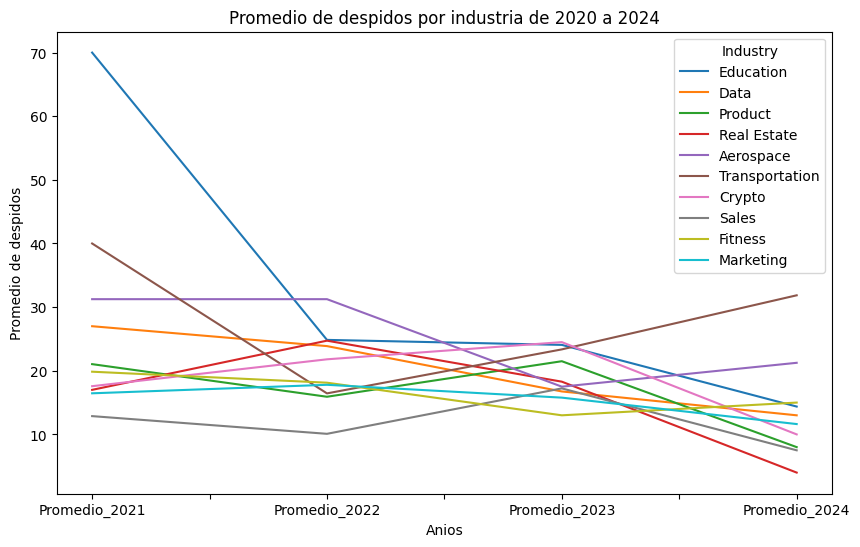

In [14]:
# Graficamos como es el comportamiento de los despidos por industria al pasar los anios 2021 a 2024
import matplotlib.pyplot as plt

df_promedio.set_index('Industry').T.plot(kind='line', figsize=(10, 6))
plt.ylabel('Promedio de despidos')
plt.xlabel('Anios')
plt.title('Promedio de despidos por industria de 2020 a 2024')
plt.show()

Podemos deducir aca que las habilidades demandadas en los ultimos anios se dividen en dos pilares, uno donde es indispensable la existencia de personas (como Education, Real Estate, Aerospace, fitness) y otro donde la inteligencia artificial forma parte del ambiente laboral y suele ser mantenido por los mismos trabajadores tal como (Data, Crypto, Marketing, Sales)

En el dataset **IA_impact_on_jobs** podemos notar que los trabajos con mayor impacto de IA son precisamente analogos a los anteriores mencionados (los del pilar referente a donde la IA forma parte del ambiente laboral), en este caso serian: Data & IT, Administrative & Clerical, Sales & Marketing, Supply Chain & Logistics

Algo que hay que tener en cuenta es que estamos englobando las habilidades de trabajo como tipo de industria, es decir, esta conclusion general llegada no es del todo especifica planteando directamente las habilidades resurgentes

In [15]:
df_IA_impact

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare
5,Chief Executive Officer (CEO),91%,153,1135,0.134802,Supply Chain & Logistics
6,Therapist,90%,114,983,0.115972,Law Enforcement
7,Chief Strategy Officer,90%,184,1284,0.143302,Construction
8,Admin,90%,253,2014,0.125621,Sales & Marketing
9,General Clerk,90%,242,1903,0.127168,Hospitality


-----------------------------------------

#### **Pregunta 3:**
¿Cuándo se observan los picos más significativos en la inversión en IA por parte de las empresas, y cómo se correlacionan estos con los cambios en las tasas de empleo en diferentes industrias?


#### **Descripción breve de los datos:**
1. **Datos de inversión global en IA:**  
   Este conjunto de datos incluye el monto de inversión global realizado por empresas en IA en diferentes años (Global corporate investment in AI). Es clave para identificar las tendencias de inversión y los años con picos más destacados.

2. **Datos del impacto de la IA en el empleo:**  
   Estos datos detallan cómo la inteligencia artificial afecta diferentes puestos y sectores, incluyendo el nivel de influencia de la IA (AI Impact) y el uso de modelos de IA en cada puesto. Esto permitirá analizar cómo la inversión en IA afecta las dinámicas del empleo.

3. **Datos de despidos y sectores empresariales:**  
   Este conjunto contiene información sobre los despidos realizados por empresas entre 2020 y 2024, incluyendo el porcentaje de reducción de empleados (Percentage), la fecha de despido y el sector de la empresa. Es útil para evaluar la relación entre la inversión en IA y los cambios en el empleo.


#### **Desarrollo y análisis:**
1. **Análisis de tendencias:**  
   Con los datos de inversión global en IA, podemos construir una gráfica de tendencias que identifique los años con mayores picos de inversión.

2. **Relación con el mercado laboral:**  
   Utilizando los datos del impacto de la IA en el empleo, es posible observar cómo los picos de inversión afectan los sectores o puestos específicos en términos de influencia de la IA, tareas realizadas y adopción de modelos de inteligencia artificial.

3. **Relación con los despidos:**  
   Comparando los datos de despidos y las tendencias de inversión en IA, se puede analizar si los picos de inversión están correlacionados con un aumento en los despidos, y determinar cuáles industrias se ven más afectadas.


Cargamos los datasets

In [20]:
investment_data = pd.read_csv('data/corporate-investment-in-artificial-intelligence-by-type.csv', usecols=['Entity', 'Year', 'Global corporate investment in AI'])
print("Datos de inversión en IA：")
print(investment_data.head())

jobs_data = pd.read_csv('data/IA_impact_on_jobs.csv', usecols=['Job titiles', 'AI Impact', 'Tasks', 'AI models', 'Domain'])
print("\nDatos de impacto de IA en el empleo：")
print(jobs_data.head())

layoffs_data = pd.read_csv('data/tech_layoffs_COMPLETO.csv', usecols=['Company', 'Date_layoffs', 'Percentage', 'Company_Size_before_Layoffs', 'Company_Size_after_layoffs', 'Industry'])
print("\nDatos de despidos：")
print(layoffs_data.head())


Datos de inversión en IA：
                Entity  Year  Global corporate investment in AI
0   Merger/acquisition  2013                         6885993015
1   Merger/acquisition  2014                         7657417878
2   Merger/acquisition  2015                        10117764887
3   Merger/acquisition  2016                        14733541676
4   Merger/acquisition  2017                        27282738436

Datos de impacto de IA en el empleo：
              Job titiles AI Impact  Tasks  AI models  \
0  Communications Manager       98%    365       2546   
1          Data Collector       95%    299       2148   
2              Data Entry       95%    325       2278   
3              Mail Clerk       95%    193       1366   
4      Compliance Officer       92%    194       1369   

                      Domain  
0         Communication & PR  
1                  Data & IT  
2  Administrative & Clerical  
3      Leadership & Strategy  
4       Medical & Healthcare  

Datos de despidos：
   

Transformamos y limpiamos los datos

In [ ]:
# Limpieza de los datos de inversión en IA
investment_data['Global corporate investment in AI'] = investment_data['Global corporate investment in AI'] / 1e9  # Convertir a miles de millones
investment_data = investment_data.sort_values('Year')  # Ordenar por año
print("\nDatos de inversión en IA después de la limpieza:")
print(investment_data.head())

# Limpieza de los datos de impacto de IA en el empleo
# Aseguramos que 'AI Impact' es de tipo string antes de aplicar .str
if jobs_data['AI Impact'].dtype != 'object':
    jobs_data['AI Impact'] = jobs_data['AI Impact'].astype(str)

# Convertir porcentaje a decimal
jobs_data['AI Impact'] = jobs_data['AI Impact'].str.rstrip('%').astype(float) / 100
print("\nDatos de impacto de IA en el empleo después de la limpieza:")
print(jobs_data.head())

# Limpieza de los datos de despidos
# Aseguramos que 'Percentage' es de tipo string antes de aplicar .str
if layoffs_data['Percentage'].dtype != 'object':
    layoffs_data['Percentage'] = layoffs_data['Percentage'].astype(str)

# Convertir valores de porcentaje a flotantes
layoffs_data['Percentage'] = layoffs_data['Percentage'].str.replace(',', '.').astype(float)

# Convertir a formato de fecha y extraer el año
layoffs_data['Date_layoffs'] = pd.to_datetime(layoffs_data['Date_layoffs'], errors='coerce')  # Convertir a formato de fecha
layoffs_data['Year'] = layoffs_data['Date_layoffs'].dt.year  # Extraer el año
print("\nDatos de despidos después de la limpieza:")
print(layoffs_data.head())



Datos de inversión en IA después de la limpieza:
                 Entity  Year  Global corporate investment in AI
0    Merger/acquisition  2013                           6.885993
22   Private investment  2013                           6.013612
33      Public offering  2013                           1.802920
44                Total  2013                          16.947452
11       Minority stake  2013                           2.244927

Datos de impacto de IA en el empleo después de la limpieza:
              Job titiles  AI Impact  Tasks  AI models  \
0  Communications Manager       0.98    365       2546   
1          Data Collector       0.95    299       2148   
2              Data Entry       0.95    325       2278   
3              Mail Clerk       0.95    193       1366   
4      Compliance Officer       0.92    194       1369   

                      Domain  
0         Communication & PR  
1                  Data & IT  
2  Administrative & Clerical  
3      Leadership & Strate

In [ ]:
# Paso 1: Asegurarse de que la columna sea de tipo string para manejar anomalías
layoffs_data['Company_Size_before_Layoffs'] = layoffs_data['Company_Size_before_Layoffs'].astype(str)
layoffs_data['Company_Size_after_layoffs'] = layoffs_data['Company_Size_after_layoffs'].astype(str)

# Paso 2: Eliminar espacios en blanco y caracteres no numéricos
layoffs_data['Company_Size_before_Layoffs'] = layoffs_data['Company_Size_before_Layoffs'].str.replace(r'\D', '', regex=True)
layoffs_data['Company_Size_after_layoffs'] = layoffs_data['Company_Size_after_layoffs'].str.replace(r'\D', '', regex=True)

# Paso 3: Convertir a valores numéricos
layoffs_data['Company_Size_before_Layoffs'] = pd.to_numeric(layoffs_data['Company_Size_before_Layoffs'], errors='coerce')
layoffs_data['Company_Size_after_layoffs'] = pd.to_numeric(layoffs_data['Company_Size_after_layoffs'], errors='coerce')

# Paso 4: Rellenar los valores nulos con la mediana
layoffs_data['Company_Size_before_Layoffs'] = layoffs_data['Company_Size_before_Layoffs'].fillna(
    layoffs_data['Company_Size_before_Layoffs'].median()
)
layoffs_data['Company_Size_after_layoffs'] = layoffs_data['Company_Size_after_layoffs'].fillna(
    layoffs_data['Company_Size_after_layoffs'].median()
)

# Verificar nuevamente los valores nulos y tipos de datos
print("\nValores nulos después de la limpieza adicional (versión corregida):")
print(layoffs_data.isnull().sum())

print("\nTipos de datos después de la limpieza adicional (versión corregida):")
print(layoffs_data.dtypes)



Valores nulos después de la limpieza adicional (versión corregida):
Company                          0
Date_layoffs                     0
Percentage                     172
Company_Size_before_Layoffs      0
Company_Size_after_layoffs       0
Industry                         0
Year                             0
dtype: int64

Tipos de datos después de la limpieza adicional (versión corregida):
Company                                object
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs           float64
Company_Size_after_layoffs            float64
Industry                               object
Year                                    int32
dtype: object


Analisis de tendencia de inversion en IA

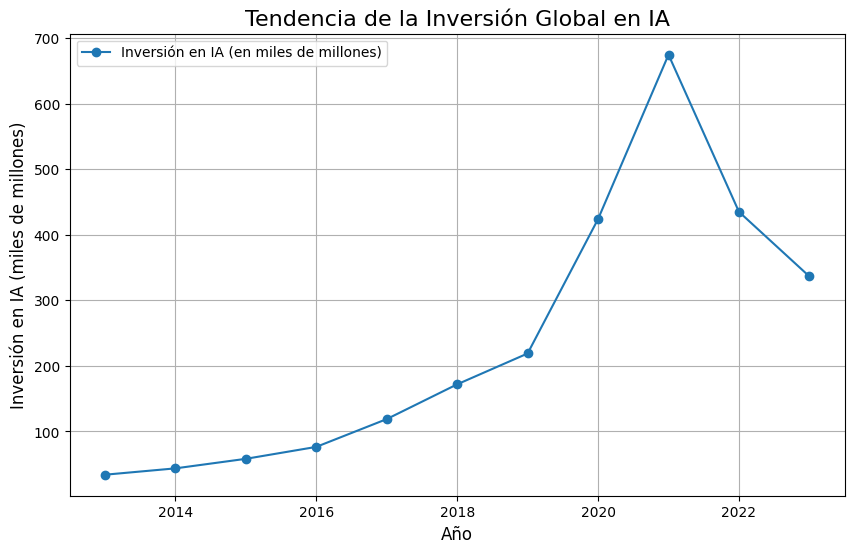

Año con la inversión máxima en IA: 2021 (674.80 miles de millones)


In [ ]:
# Agrupar los datos de inversión por año y calcular la suma total
investment_trend = investment_data.groupby('Year')['Global corporate investment in AI'].sum()

# Dibujar la gráfica de tendencias
plt.figure(figsize=(10, 6))
plt.plot(investment_trend.index, investment_trend.values, marker='o', linestyle='-', label='Inversión en IA (en miles de millones)')
plt.title('Tendencia de la Inversión Global en IA', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Inversión en IA (miles de millones)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Identificar los años con inversión máxima
peak_year = investment_trend.idxmax()
peak_investment = investment_trend.max()
print(f"Año con la inversión máxima en IA: {peak_year} ({peak_investment:.2f} miles de millones)")

Analisis de impacto en el empleo


Top 5 dominios más afectados por IA:
Domain
Communication & PR           0.303885
Data & IT                    0.303546
Administrative & Clerical    0.303397
Leadership & Strategy        0.303248
Law Enforcement              0.303085
Name: AI Impact, dtype: float64


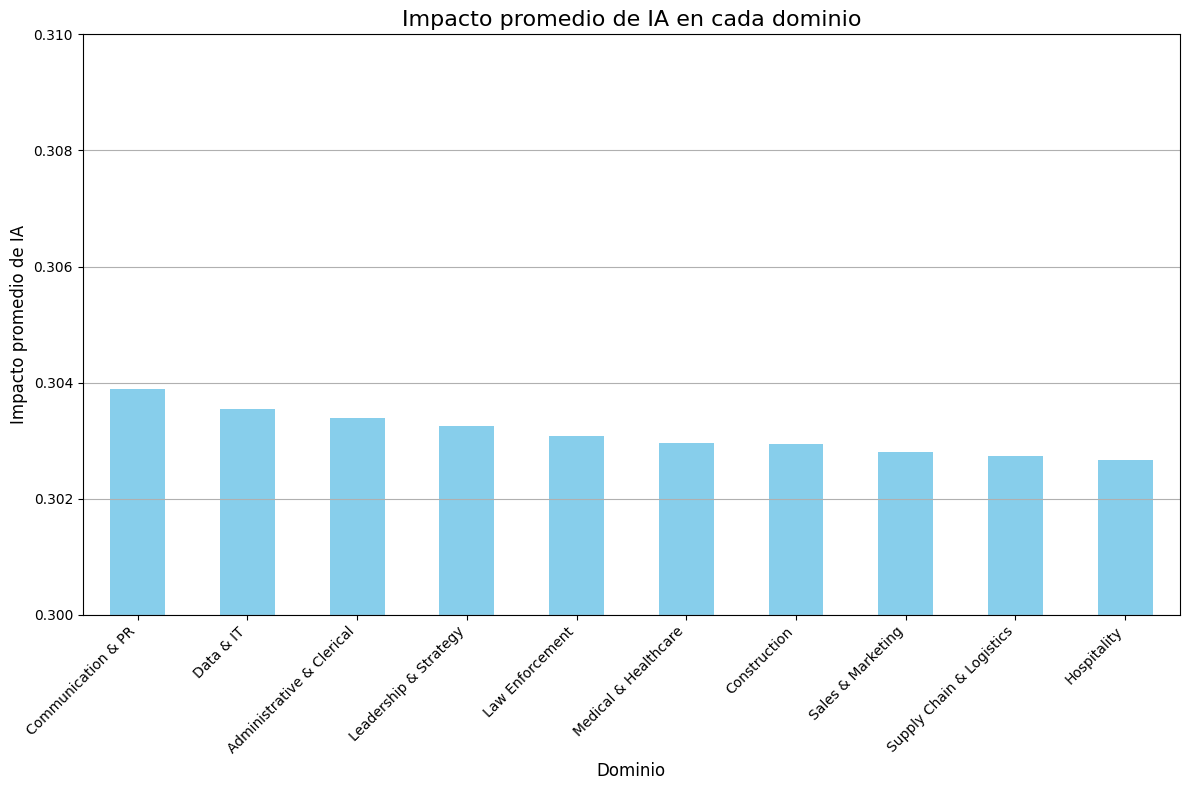


Top 5 trabajos más afectados por IA:
              Job titiles  AI Impact  Tasks  AI models
0  Communications Manager       0.98    365       2546
2              Data Entry       0.95    325       2278
3              Mail Clerk       0.95    193       1366
1          Data Collector       0.95    299       2148
4      Compliance Officer       0.92    194       1369


In [ ]:
# Agrupar por 'Domain' y calcular el impacto promedio de IA en cada dominio
domain_impact = jobs_data.groupby('Domain')['AI Impact'].mean().sort_values(ascending=False)

# Mostrar los 5 dominios más afectados
print("\nTop 5 dominios más afectados por IA:")
print(domain_impact.head(5))

# Visualizar el impacto promedio por dominio con rango ajustado en el eje Y
plt.figure(figsize=(12, 8))
domain_impact.plot(kind='bar', color='skyblue')
plt.title('Impacto promedio de IA en cada dominio', fontsize=16)
plt.xlabel('Dominio', fontsize=12)
plt.ylabel('Impacto promedio de IA', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.3, 0.31)  # Ajustar el rango del eje Y
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Identificar los 5 trabajos más afectados por IA
top_jobs = jobs_data.sort_values('AI Impact', ascending=False).head(5)

print("\nTop 5 trabajos más afectados por IA:")
print(top_jobs[['Job titiles', 'AI Impact', 'Tasks', 'AI models']])


Análisis de tendencias de despidos (2 plots)

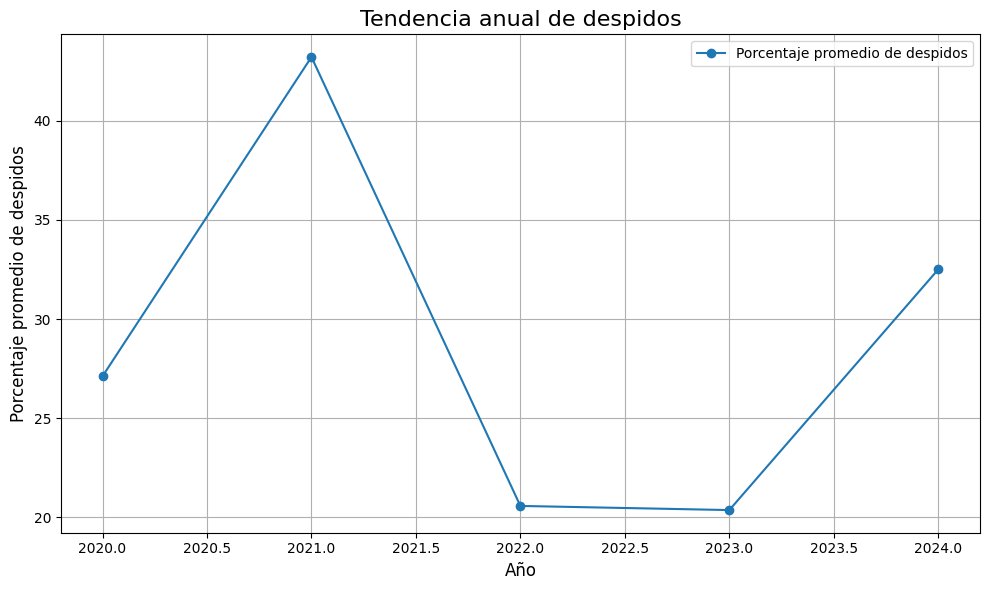


Año con mayor porcentaje promedio de despidos: 2021

Top 5 industrias con mayor porcentaje promedio de despidos:
Industry
Environmental Services    100.000000
Social posting site       100.000000
Insurance                  92.333333
Gaming                     48.000000
Aerospace                  36.666667
Name: Percentage, dtype: float64

Top 5 industrias con mayor porcentaje promedio de despidos (después de eliminar 100%):
Industry
Insurance                 77.00
cloud                     30.00
Fintech                   29.50
Aerospace                 28.75
Biotechnology Research    25.00
Name: Percentage, dtype: float64


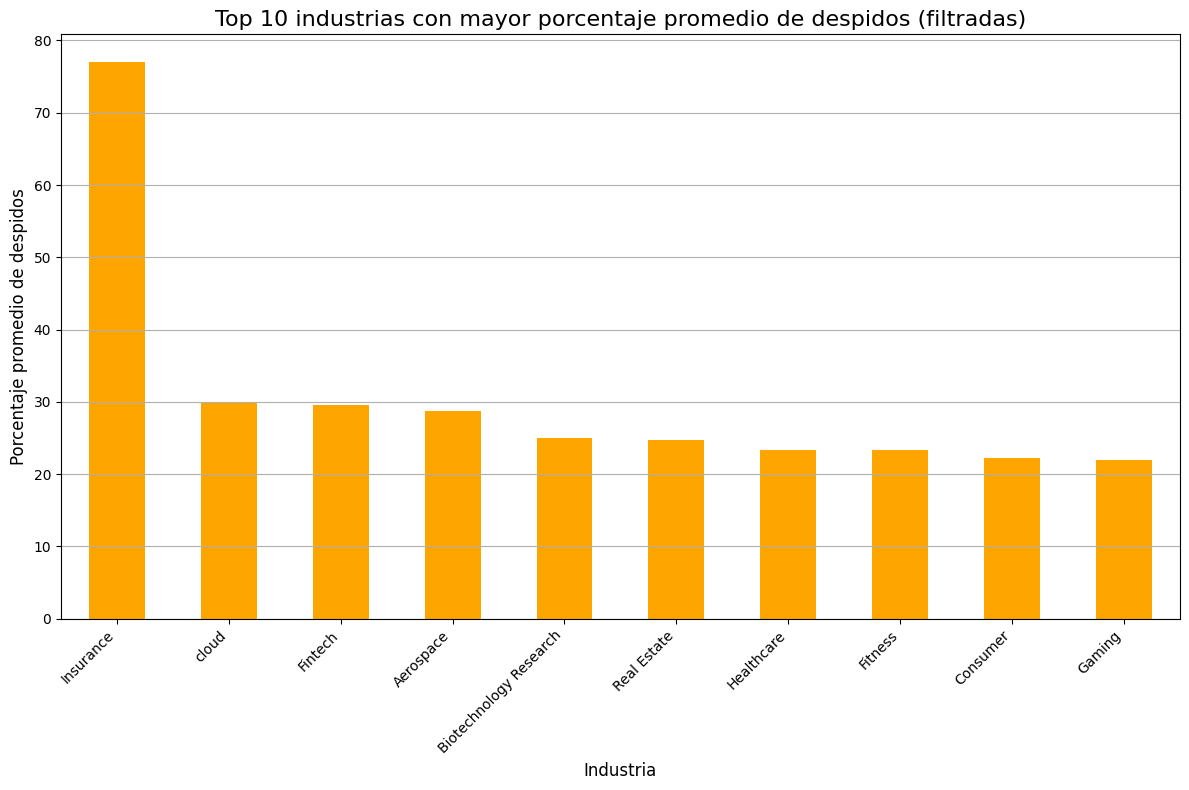

In [ ]:
# Agrupar por año y calcular el promedio y total de despidos
yearly_layoffs = layoffs_data.groupby('Year').agg(
    average_percentage=('Percentage', 'mean'),
    total_laid_off=('Company_Size_before_Layoffs', 'sum')
).sort_index()

# Visualizar tendencia anual de despidos
plt.figure(figsize=(10, 6))
plt.plot(yearly_layoffs.index, yearly_layoffs['average_percentage'], marker='o', label='Porcentaje promedio de despidos')
plt.title('Tendencia anual de despidos', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje promedio de despidos', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Identificar el año con mayor porcentaje promedio de despidos
peak_layoff_year = yearly_layoffs['average_percentage'].idxmax()
print(f"\nAño con mayor porcentaje promedio de despidos: {peak_layoff_year}")

# Agrupar por industria y calcular el promedio de despidos
industry_layoffs = layoffs_data.groupby('Industry')['Percentage'].mean().sort_values(ascending=False)

# Mostrar las 5 industrias con mayor porcentaje promedio de despidos
print("\nTop 5 industrias con mayor porcentaje promedio de despidos:")
print(industry_layoffs.head(5))

# Visualizar impacto por industria
# Filtrar industrias con porcentaje de despidos menor al 100%
filtered_layoffs_data = layoffs_data[layoffs_data['Percentage'] < 100]

# Recalcular el promedio de despidos por industria
industry_layoffs_filtered = filtered_layoffs_data.groupby('Industry')['Percentage'].mean().sort_values(ascending=False)

# Mostrar las 5 industrias principales después del filtro
print("\nTop 5 industrias con mayor porcentaje promedio de despidos (después de eliminar 100%):")
print(industry_layoffs_filtered.head(5))

# Visualizar impacto por industria después del filtro
plt.figure(figsize=(12, 8))
industry_layoffs_filtered.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 industrias con mayor porcentaje promedio de despidos (filtradas)', fontsize=16)
plt.xlabel('Industria', fontsize=12)
plt.ylabel('Porcentaje promedio de despidos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Visualizacion final


El año con la inversión máxima en IA fue: 2021

En el año 2021, el porcentaje promedio de despidos (filtrado) fue: 27.73%

Top 5 trabajos más afectados por IA (en general):
              Job titiles  AI Impact  Tasks  AI models
0  Communications Manager       0.98    365       2546
2              Data Entry       0.95    325       2278
3              Mail Clerk       0.95    193       1366
1          Data Collector       0.95    299       2148
4      Compliance Officer       0.92    194       1369

Top 5 industrias con mayores despidos en el año pico de inversión (filtradas):
Industry
Education         70.0
Transportation    40.0
Data              27.0
Real Estate       17.0
Other             15.0
Name: Percentage, dtype: float64


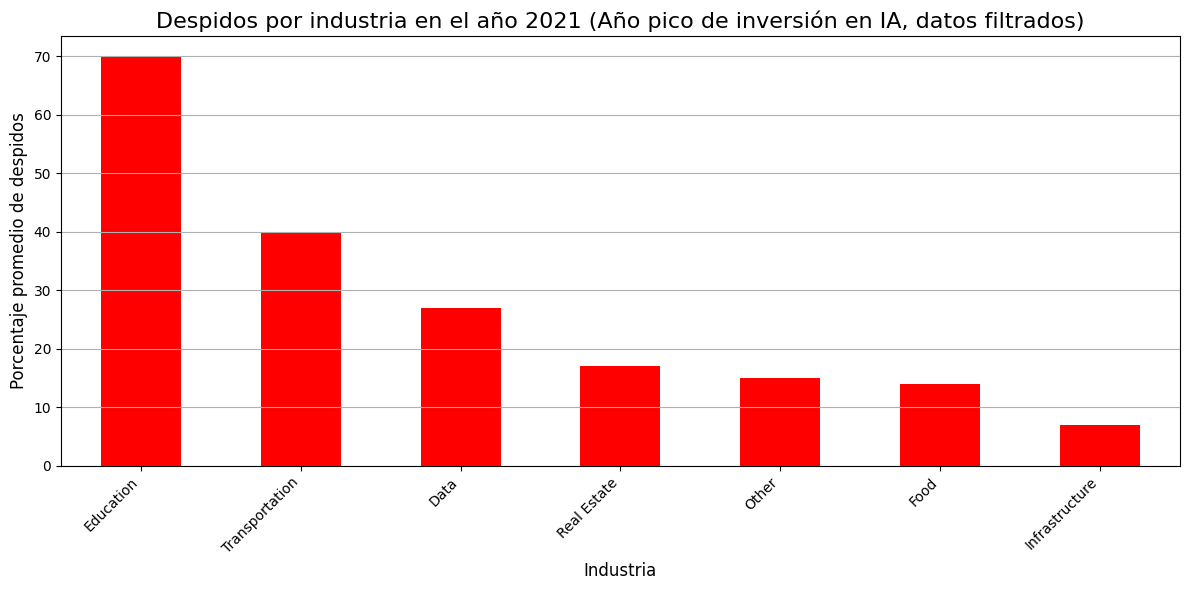

In [ ]:
# 1. Obtener el año con inversión máxima en IA
investment_peak_year = investment_trend.idxmax()
print(f"\nEl año con la inversión máxima en IA fue: {investment_peak_year}")

# 2. Filtrar datos de despidos para el año de inversión máxima
# Usamos el dataset filtrado sin industrias con 100% de despidos
layoffs_peak_year_filtered = filtered_layoffs_data[filtered_layoffs_data['Year'] == investment_peak_year]

# Calcular el promedio de porcentaje de despidos en el año pico (datos filtrados)
average_layoffs_peak_filtered = layoffs_peak_year_filtered['Percentage'].mean()
print(f"\nEn el año {investment_peak_year}, el porcentaje promedio de despidos (filtrado) fue: {average_layoffs_peak_filtered:.2f}%")

# 3. Analizar el impacto de IA en los trabajos durante el año pico de inversión
# Obtener los trabajos más afectados en todos los años
most_affected_jobs = jobs_data.sort_values('AI Impact', ascending=False).head(5)
print("\nTop 5 trabajos más afectados por IA (en general):")
print(most_affected_jobs[['Job titiles', 'AI Impact', 'Tasks', 'AI models']])

# 4. Relación entre inversión y despidos por industria en el año pico
industry_layoffs_peak_filtered = layoffs_peak_year_filtered.groupby('Industry')['Percentage'].mean().sort_values(ascending=False)
print("\nTop 5 industrias con mayores despidos en el año pico de inversión (filtradas):")
print(industry_layoffs_peak_filtered.head(5))

# Visualización: Relación de despidos e inversión en el año pico (datos filtrados)
plt.figure(figsize=(12, 6))
industry_layoffs_peak_filtered.head(10).plot(kind='bar', color='red')
plt.title(f'Despidos por industria en el año {investment_peak_year} (Año pico de inversión en IA, datos filtrados)', fontsize=16)
plt.xlabel('Industria', fontsize=12)
plt.ylabel('Porcentaje promedio de despidos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### **Resumen del impacto de la inversión en IA en el empleo**

#### **Uso de los tres conjuntos de datos**
Los tres conjuntos de datos proporcionan una perspectiva integral sobre cómo la inversión en inteligencia artificial (IA) afecta el mercado laboral:
- **Inversión en IA**: Identifica el año pico de inversión en IA (2021) y lo utiliza como referencia para analizar su impacto.
- **Impacto de la IA en los empleos**: Analiza qué puestos de trabajo son los más afectados por la IA y en qué medida.
- **Despidos por industria**: Explora cómo diferentes industrias se vieron afectadas en términos de despidos durante el año pico de inversión en IA.

#### **1. Año pico de la inversión en IA**
- **Año**: 2021 fue el año con el mayor nivel de inversión global en IA.
- **Relación con despidos**:
  - En 2021, el porcentaje promedio de despidos (tras filtrar valores extremos) fue del **27.73%**, reflejando un impacto significativo, aunque menor al observado previamente.
  - **Sectores como educación y transporte** destacaron con altos porcentajes de despidos, mostrando la presión de modernización tecnológica en estas áreas.

#### **2. Impacto de la IA en los puestos de trabajo**
- **Puestos más afectados por la IA**:
  - **Gerente de Comunicaciones (Communications Manager)** fue el puesto más afectado, con un impacto de IA del **98%**.
  - Otros puestos significativamente afectados incluyen **Entrada de Datos (Data Entry)**, **Recolector de Datos (Data Collector)** y **Auxiliar de Correo (Mail Clerk)**, todos con un impacto superior al **95%**.
- **Características principales**:
  - Los trabajos con alto impacto de IA suelen implicar **tareas repetitivas** o **procesos fácilmente automatizables**, haciéndolos más susceptibles de ser reemplazados por tecnologías basadas en IA.
  - Ejemplos como la entrada y recolección de datos reflejan este patrón, indicando la necesidad de reentrenar a los trabajadores para roles más avanzados.

#### **3. Distribución de despidos por industria**
- **Industrias con más despidos**:
  - **Educación** lideró con un porcentaje promedio de despidos del **70%**, reflejando una significativa reestructuración tecnológica en el sector.
  - **Transporte** tuvo un porcentaje de despidos del **40%**, indicando una transición gradual hacia la automatización.
  - Otros sectores como **Data (27%)**, **Bienes Raíces (Real Estate, 17%)** y **Otros (15%)** también mostraron impactos significativos.
- **Análisis adicional**:
  - Sectores como la educación pueden estar ajustándose a nuevas tecnologías y metodologías de trabajo, mientras que el transporte experimenta una modernización en sus procesos logísticos.

#### **4. Relación entre la inversión en IA y los despidos por industria**
- El crecimiento de la inversión en IA (especialmente en 2021) impulsó la **modernización tecnológica** y, en algunos casos, resultó en **ajustes significativos de recursos humanos**:
  - **Educación** y **Transporte** experimentaron un impacto significativo, posiblemente debido a la adopción de tecnologías automatizadas en roles administrativos y operativos.
  - Otros sectores como **Data** mostraron un impacto más leve pero aún notable, relacionado con la transición hacia procesos más automatizados y basados en datos.

### **Conclusión**
El pico de inversión en IA en 2021 marcó un punto de inflexión en varios sectores, con un impacto significativo en la reestructuración laboral y los patrones de despidos. Aunque algunos sectores como la educación y el transporte enfrentaron mayores desafíos, esta tendencia resalta la necesidad de políticas y estrategias enfocadas en:
1. **Reentrenamiento laboral** para roles menos susceptibles a la automatización.
2. **Apoyo a sectores con alta densidad de mano de obra** para integrar tecnologías sin desplazar de manera masiva a los trabajadores.
3. **Adopción estratégica de IA** para maximizar sus beneficios mientras se minimizan los impactos negativos en el empleo.


---

#### **Pregunta 4:**  
¿Dónde (en qué países) se está produciendo la adopción más rápida de la IA en el ámbito laboral y cómo esto está afectando las disparidades económicas y de empleo entre diferentes áreas geográficas?


#### **Descripción breve de los datos:**  

**Datos de patentes de IA por industria:**  
Este conjunto de datos contiene información detallada sobre el número de patentes relacionadas con la inteligencia artificial otorgadas en diferentes países y sectores industriales (Patent applications granted).  
Estas patentes son indicadores clave de la adopción tecnológica, lo que permite analizar:
- **Los países líderes en innovación tecnológica.**
- **La distribución de las patentes por sectores económicos,** como telecomunicaciones, transporte, dispositivos personales y ciencias de la vida.


#### **Desarrollo y análisis:**  

1. **Análisis por país:**  
   Usando los datos de patentes de IA, se identifican los países con mayor número de patentes otorgadas. Esto permite determinar las naciones que lideran la adopción de IA y cuantificar su ritmo de crecimiento tecnológico. También se destacan los países con menor actividad para evaluar posibles brechas tecnológicas.

2. **Distribución sectorial:**  
   Analizando los sectores con más patentes, se identifican las áreas económicas donde la IA está siendo más adoptada, como dispositivos personales, telecomunicaciones o transporte. Esto ayuda a entender qué industrias están liderando la transformación digital.

3. **Desigualdades económicas y laborales:**  
   Comparando los países líderes con aquellos con menos patentes, se evalúa si existe una concentración de la innovación tecnológica en ciertas regiones. Además, se analiza cómo esta concentración podría estar amplificando las desigualdades económicas y laborales entre países, considerando la capacidad de implementar tecnologías avanzadas.

In [ ]:
# Leer los datos de patentes
patent_data = pd.read_csv('data/artificial-intelligence-granted-patents-by-industry.csv')

# Verificar valores nulos
print("Valores nulos por columna:")
print(patent_data.isnull().sum())

# Revisión de tipos de datos
print("\nTipos de datos originales:")
print(patent_data.dtypes)

# Asegurar que las columnas de patentes sean de tipo numérico
patent_columns = [col for col in patent_data.columns if 'Patent applications granted' in col]
for col in patent_columns:
    patent_data[col] = pd.to_numeric(patent_data[col], errors='coerce')

# Llenar valores nulos en columnas de patentes con 0 (asumiendo que significa sin patentes)
patent_data[patent_columns] = patent_data[patent_columns].fillna(0)

# Asegurar que 'Year' sea de tipo numérico
patent_data['Year'] = pd.to_numeric(patent_data['Year'], errors='coerce')

# Crear una nueva columna para el total de patentes por fila
patent_data['Total Patents'] = patent_data[patent_columns].sum(axis=1)

# Verificar posibles valores extremos (patentes negativas o valores absurdamente altos)
print("\nEstadísticas descriptivas del total de patentes:")
print(patent_data['Total Patents'].describe())

# Filtrar filas con valores inválidos (por ejemplo, años faltantes o patentes negativas)
patent_data = patent_data[(patent_data['Year'].notnull()) & (patent_data['Total Patents'] >= 0)]

# Mostrar una vista previa de los datos limpios
print("\nVista previa de los datos limpios:")
print(patent_data.head())

# Agrupar por país y año para calcular el total de patentes
patent_summary = patent_data.groupby(['Entity', 'Year'])['Total Patents'].sum().reset_index()

# Mostrar el resumen del total de patentes agrupado por país y año
print("\nResumen del total de patentes por país y año:")
print(patent_summary.head())


Valores nulos por columna:
Entity                                                                    0
Code                                                                      0
Year                                                                      0
Patent applications granted - Field: Banking and finance                  0
Patent applications granted - Field: Industry and manufacturing           0
Patent applications granted - Field: Energy management                    0
Patent applications granted - Field: Physical sciences and engineering    0
Patent applications granted - Field: Security                             0
Patent applications granted - Field: Life sciences                        0
Patent applications granted - Field: Transportation                       0
Patent applications granted - Field: Business                             0
Patent applications granted - Field: Telecommunications                   0
Patent applications granted - Field: Personal devices and com

### **Análisis de los Países con más Patentes Totales**

#### **Objetivo**
El propósito de este análisis es identificar los países que lideran en la adopción de tecnologías de inteligencia artificial (IA) a través del número total de patentes concedidas. Este análisis es fundamental para entender qué regiones están más avanzadas en el desarrollo y aplicación de IA.

#### **Qué se hizo en este paso**
1. Se agruparon los datos de patentes por país.
2. Se calculó el total de patentes concedidas para cada país.
3. Se identificaron los 10 países con el mayor número de patentes.
4. Se visualizó esta información en un gráfico de barras para facilitar la interpretación.

#### **Resultados esperados**
- Conocer los países que lideran en el desarrollo de tecnologías de IA.
- Identificar posibles concentraciones geográficas de innovación tecnológica.
- Utilizar esta información como base para analizar la relación entre la adopción de IA y los indicadores económicos en diferentes regiones.



Top 10 países con más patentes totales:
Entity
World             202991
China              84608
United States      68757
South Korea        19245
Japan              13244
Canada              3095
Australia           2757
Germany             2148
United Kingdom      1543
Russia              1152
Name: Total Patents, dtype: int64

El país con más patentes es: World, con un total de 202991 patentes.


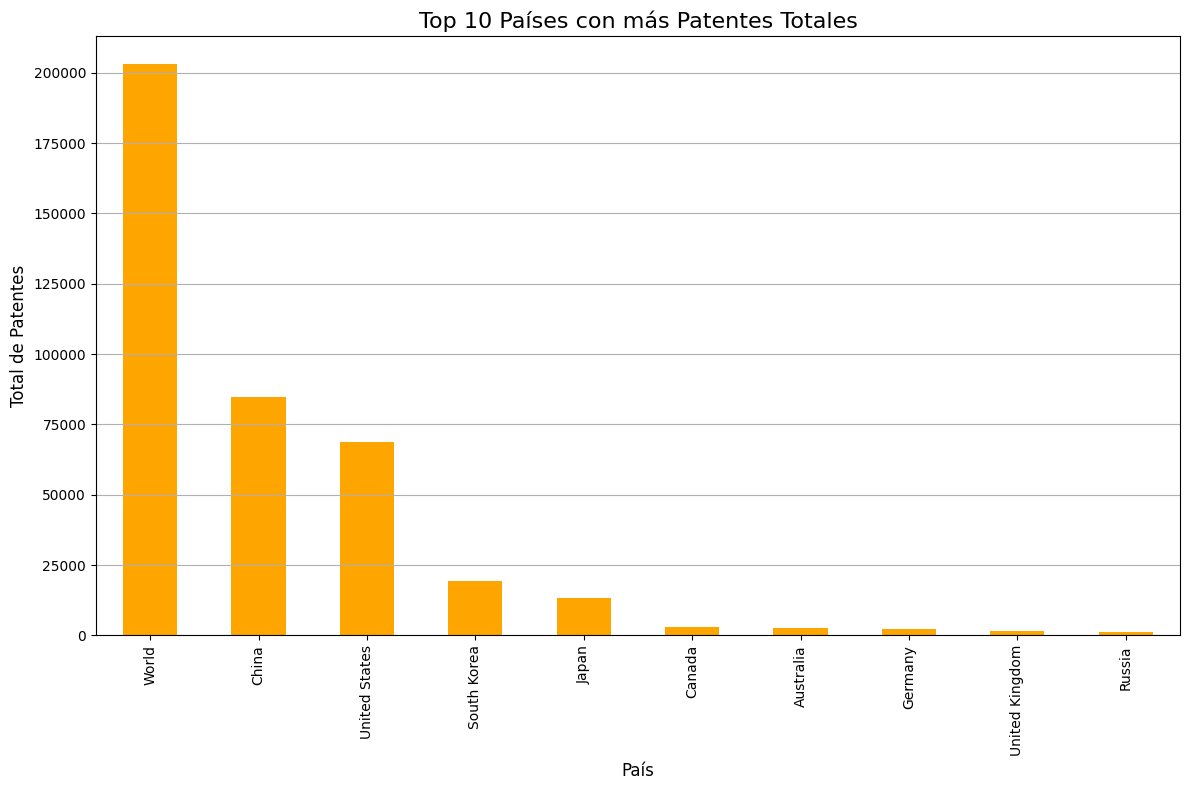

In [ ]:
# Top países por total de patentes
country_patents = patent_summary.groupby('Entity')['Total Patents'].sum().sort_values(ascending=False)

# Mostrar el total de patentes por país (los primeros 10 países)
print("\nTop 10 países con más patentes totales:")
print(country_patents.head(10))

# Mostrar el país con el mayor número de patentes
top_country = country_patents.idxmax()
top_country_patents = country_patents.max()
print(f"\nEl país con más patentes es: {top_country}, con un total de {top_country_patents} patentes.")

# Visualizar top 10 países
plt.figure(figsize=(12, 8))
country_patents.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Países con más Patentes Totales', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Total de Patentes', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### **Análisis de la Tendencia Global de Patentes**

#### **Objetivo**
Este análisis tiene como propósito entender cómo ha evolucionado la adopción de tecnologías de inteligencia artificial (IA) en todo el mundo a lo largo de los años. Esto se logra observando la tendencia de crecimiento en el número total de patentes globales concedidas.

#### **Qué se hizo en este paso**
1. Se agruparon los datos de patentes por año.
2. Se calculó el número total de patentes concedidas para cada año.
3. Se identificó el año con la mayor cantidad de patentes globales concedidas.
4. Se generó un gráfico de línea para visualizar la tendencia anual.

#### **Resultados esperados**
- Identificar los periodos de crecimiento más rápido en la adopción de tecnologías de IA.
- Determinar el año con la mayor cantidad de innovación tecnológica en términos de patentes.
- Usar esta información para analizar qué factores podrían haber impulsado estas tendencias.

#### **Beneficios del análisis**
Este análisis proporciona una visión global del desarrollo tecnológico, identificando patrones de crecimiento y momentos clave que podrían estar relacionados con políticas, inversiones o avances científicos importantes.



Tendencia global del total de patentes (estadísticas):
count         8.000000
mean      50747.750000
std       40966.621388
min        7710.000000
25%       14802.000000
50%       42240.000000
75%       82165.500000
max      112742.000000
Name: Total Patents, dtype: float64

El año con más patentes globales es: 2020, con un total de 112742 patentes.


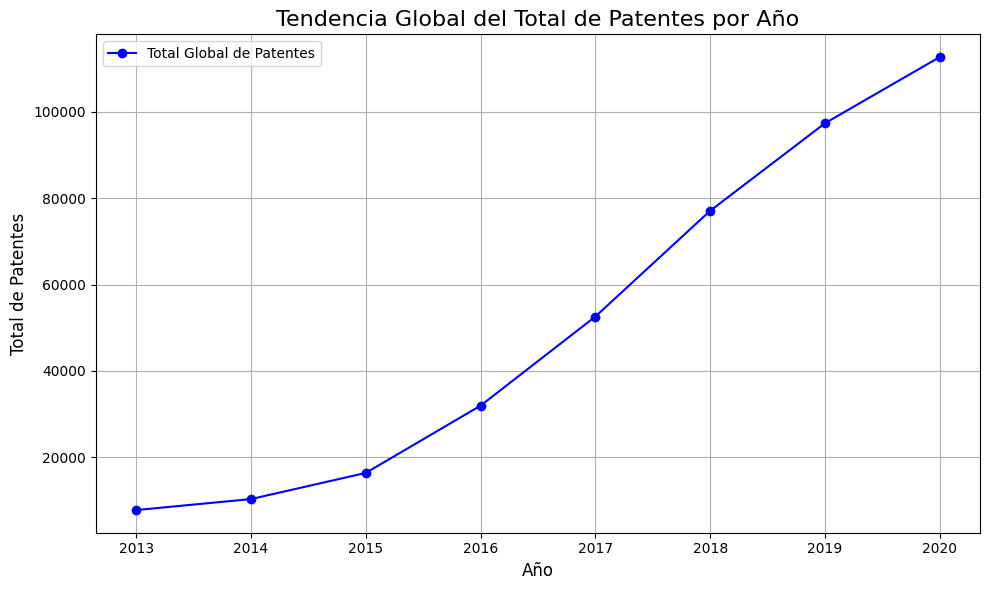

In [ ]:
# Tendencia global del total de patentes
global_patents_trend = patent_summary.groupby('Year')['Total Patents'].sum()

# Mostrar estadísticas generales sobre la tendencia global
print("\nTendencia global del total de patentes (estadísticas):")
print(global_patents_trend.describe())

# Mostrar el año con más patentes y el total de patentes en ese año
peak_year = global_patents_trend.idxmax()
peak_patents = global_patents_trend.max()
print(f"\nEl año con más patentes globales es: {peak_year}, con un total de {peak_patents} patentes.")

# Visualizar la tendencia global de las patentes
plt.figure(figsize=(10, 6))
plt.plot(global_patents_trend.index, global_patents_trend.values, marker='o', color='blue', label='Total Global de Patentes')
plt.title('Tendencia Global del Total de Patentes por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total de Patentes', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### **Análisis de la Distribución de Patentes por Industria**

#### **Objetivo**
Este análisis busca identificar las industrias donde la tecnología de inteligencia artificial (IA) ha tenido mayor impacto en términos de innovación, medida por el número de patentes concedidas.

#### **Qué se hizo en este paso**
1. Se sumaron los números de patentes concedidas en cada industria a lo largo de todos los años y países.
2. Se ordenaron las industrias por el total de patentes concedidas.
3. Se identificaron las industrias con más patentes, destacando el top 5.
4. Se generó un gráfico de barras para visualizar la distribución de patentes entre las diferentes industrias.

#### **Resultados esperados**
- Conocer qué sectores económicos están adoptando la IA más rápidamente.
- Determinar las industrias donde la innovación tecnológica es más prominente.
- Proporcionar una base para un análisis más detallado de las aplicaciones de IA en sectores clave.

#### **Beneficios del análisis**
La información obtenida puede ser usada para:
- Guiar políticas de inversión y desarrollo tecnológico hacia sectores con alto potencial.
- Analizar cómo la IA está transformando diferentes áreas económicas.
- Identificar oportunidades de colaboración o investigación en sectores líderes.



Top 5 industrias con más patentes:
Patent applications granted - Field: Personal devices and computing    171638
Patent applications granted - Field: Telecommunications                 56862
Patent applications granted - Field: Business                           37980
Patent applications granted - Field: Life sciences                      37210
Patent applications granted - Field: Transportation                     33000
dtype: int64

La industria con más patentes es: Patent applications granted - Field: Personal devices and computing, con un total de 171638 patentes.


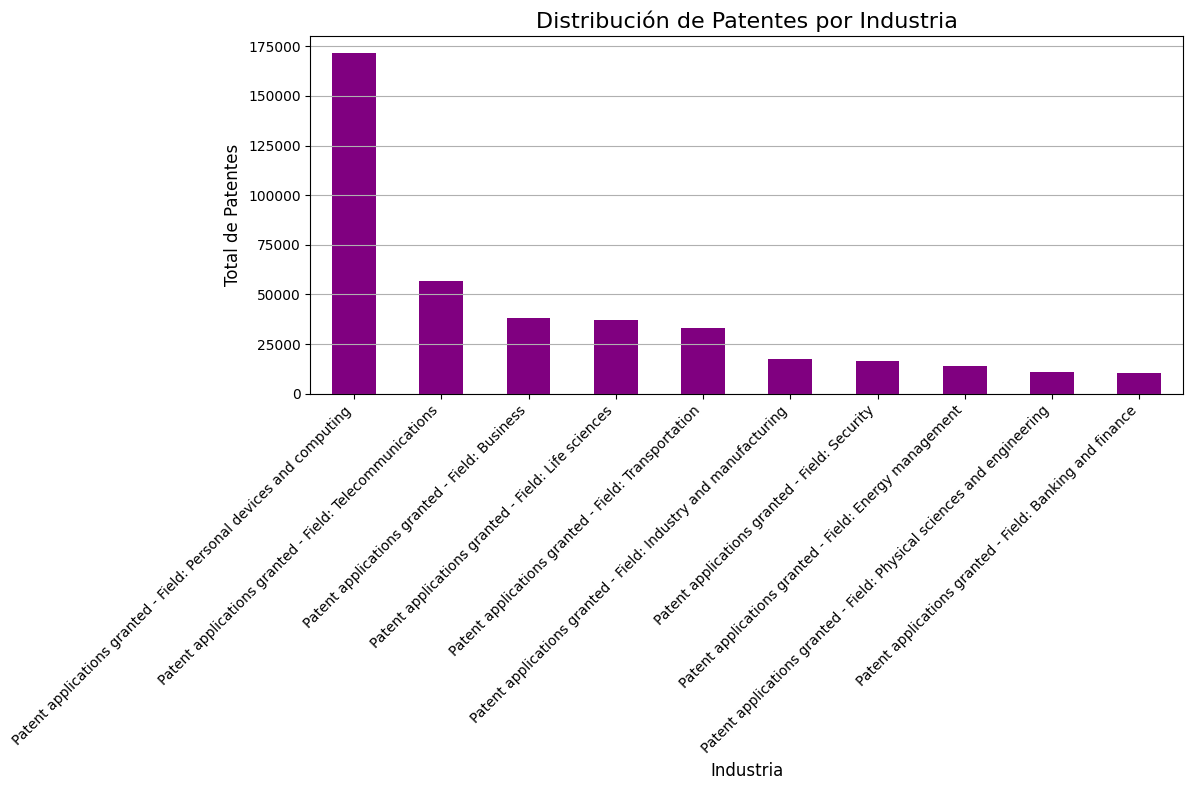

In [ ]:
# Distribución por industria
industry_summary = patent_data[patent_columns].sum().sort_values(ascending=False)

# Mostrar la distribución de patentes por industria (top 5 industrias)
print("\nTop 5 industrias con más patentes:")
print(industry_summary.head(5))

# Mostrar la industria con más patentes y su total
top_industry = industry_summary.idxmax()
top_industry_patents = industry_summary.max()
print(f"\nLa industria con más patentes es: {top_industry}, con un total de {top_industry_patents} patentes.")

# Visualizar la distribución por industria
plt.figure(figsize=(12, 8))
industry_summary.plot(kind='bar', color='purple')
plt.title('Distribución de Patentes por Industria', fontsize=16)
plt.xlabel('Industria', fontsize=12)
plt.ylabel('Total de Patentes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### **Visualización del Impacto de la Adopción Rápida de IA**

#### **Gráfico de Pastel: Distribución de Patentes por Industria**
Este gráfico de pastel destaca:
- Las 5 industrias principales con el mayor número de patentes concedidas.
- La proporción relativa de patentes en cada industria.

Objetivo:
- Entender en qué sectores económicos se concentra la innovación de IA.
- Guiar estrategias de desarrollo tecnológico hacia las industrias clave.



Distribución de patentes por industria (top 5):
Patent applications granted - Field: Personal devices and computing    171638
Patent applications granted - Field: Telecommunications                 56862
Patent applications granted - Field: Business                           37980
Patent applications granted - Field: Life sciences                      37210
Patent applications granted - Field: Transportation                     33000
dtype: int64


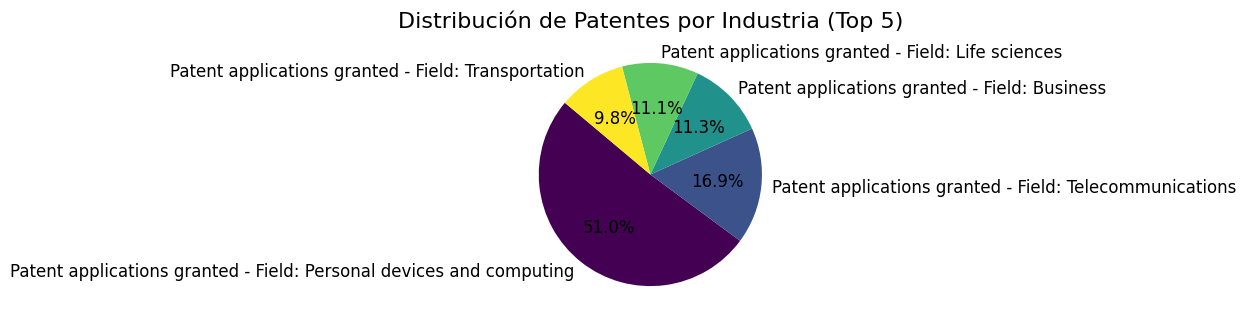

In [ ]:
# Mostrar las principales industrias y sus totales
print("\nDistribución de patentes por industria (top 5):")
print(industry_summary.head(5))

plt.figure(figsize=(10, 8))
industry_summary.head(5).plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis', fontsize=12)
plt.title('Distribución de Patentes por Industria (Top 5)', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()


### **Conclusiones sobre la Adopción de IA en el Ámbito Laboral y su Impacto en las Desigualdades Económicas**

#### **1. Países con Adopción más Rápida de la IA**
- **China** lidera el desarrollo de tecnologías de IA, acumulando un total de **84,608 patentes**, representando una proporción significativa de la innovación global.
- Otros países destacados incluyen:
  - **Estados Unidos** (68,757 patentes): Un actor clave, especialmente en investigación y desarrollo empresarial.
  - **Corea del Sur** (19,245 patentes): Fuerte crecimiento en tecnología avanzada.
  - **Japón** (13,244 patentes): Innovación sostenida, especialmente en manufactura y telecomunicaciones.
  - **Canadá** (3,095 patentes): A pesar de números más bajos, muestra una tendencia consistente hacia el crecimiento.

#### **2. Tendencias Anuales de Patentes**
- El crecimiento más rápido se observó en **China**, con un salto significativo entre 2015 y 2020. Pasó de **1,507 patentes en 2015** a **35,158 en 2020**, destacándose como un motor global de innovación.
- **Estados Unidos** y **Corea del Sur** también muestran patrones de crecimiento sostenido, aunque a un ritmo menor que China.
- La mayoría de los países presentaron un pico de innovación en **2020**, que coincide con el avance en IA aplicada durante este periodo.

#### **3. Concentración Regional de Patentes**
- La mayoría de las patentes se concentran en **Asia Oriental** (China, Corea del Sur, Japón), lo que indica una fuerte dominancia de esta región en el desarrollo de tecnologías de IA.
- **América del Norte** (Estados Unidos y Canadá) sigue siendo una región clave, pero con menor crecimiento reciente comparado con Asia.

#### **4. Sectores con Mayor Adopción de IA**
- **Dispositivos personales y computación** lideran con **171,638 patentes**, reflejando una alta inversión en hardware y software para consumidores.
- **Telecomunicaciones** (**56,862 patentes**) y **negocios** (**37,980 patentes**) también destacan, mostrando cómo la IA transforma las industrias de comunicación y gestión empresarial.
- Sectores como **ciencias de la vida** y **transporte** muestran una adopción creciente, con impactos directos en áreas como la salud y la logística.

#### **5. Impacto en las Desigualdades Económicas**
- La concentración de patentes en países como China, Estados Unidos y Corea del Sur indica una brecha tecnológica significativa entre estas regiones y otras partes del mundo.
- La fuerte adopción de IA en sectores específicos podría exacerbar desigualdades laborales:
  - En países con menor capacidad de innovación, los trabajadores podrían enfrentar más desafíos para competir en un mercado global dominado por IA.
  - Las industrias con alta automatización, como transporte y manufactura, podrían ver un desplazamiento significativo de empleos, especialmente en países en desarrollo.

Estas conclusiones resaltan cómo la adopción acelerada de la IA, aunque impulsa la innovación, también plantea desafíos importantes que deben abordarse para garantizar un desarrollo equitativo.


------------------------------

#### **Pregunta 5:**
¿Por qué ciertos roles o niveles jerárquicos dentro 
de las organizaciones parecen ser más susceptibles a la automatización por IA, 
y cómo esto está reconfigurando la estructura organizacional de las empresas?

Para esta pregunta abarcaremos todos los datasets dado que necesitamos explorar las industrias por sus cantidades de despidos, inversiones en IA y el impacto de la IA en los empleados

In [16]:
dfs = {}

dfs["df1"] = pd.read_csv(os.path.join('data','artificial-intelligence-granted-patents-by-industry.csv'))
dfs["df2"] = pd.read_csv(os.path.join('data','corporate-investment-in-artificial-intelligence-by-type.csv'))
dfs["df3"] = pd.read_csv(os.path.join('data','newly-funded-artificial-intelligence-companies.csv'))
dfs["df4"] = pd.read_csv(os.path.join('data','IA_impact_on_jobs.csv'))
dfs["df5"] = pd.read_csv(os.path.join('data','tech_layoffs_COMPLETO.csv'))


# Datos ordenados
# Dataset 1: Impacto de IA en trabajos
df_impact = pd.read_csv('data/IA_impact_on_jobs.csv')

# Dataset 2: Patentes de IA por sector
df_patents = pd.read_csv('data/artificial-intelligence-granted-patents-by-industry.csv')

# Dataset 3: Inversión corporativa en IA
df_investment = pd.read_csv('data/corporate-investment-in-artificial-intelligence-by-type.csv')

# Dataset 4: Nuevas empresas de IA
df_companies = pd.read_csv('data/newly-funded-artificial-intelligence-companies.csv')

# Dataset 5: Despidos tecnológicos
df_layoffs = pd.read_csv('data/tech_layoffs_COMPLETO.csv')

# Dataset 6: Datos de empresas europeas
df_eu = pd.read_excel('data/isoc_eb_ai$defaultview_spreadsheet.xlsx', sheet_name='Sheet 1')

c:\Users\adria\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


#### 1.1 Análisis por dominio y nivel jerárquico

In [17]:
print("\nAnálisis de impacto por dominio:")

# Sacar del data 4, las areas de ia, como modelos la cantidad de tareas
# Usamos el Dominio
domain_analysis = dfs["df4"].groupby('Domain').agg({
    'AI_Workload_Ratio': 'mean',
    'AI models': 'mean',
    'Tasks': 'mean'
}).sort_values('AI_Workload_Ratio', ascending=False)

domain_analysis

# y Creamos 2 graficos para sacar información


Análisis de impacto por dominio:


,AI_Workload_Ratio,AI models,Tasks
Domain,,,
Administrative & Clerical,inf,1808.208068,395.673036
Construction,inf,1849.408511,410.734043
Data & IT,inf,1814.462845,392.452229
Law Enforcement,inf,1778.427660,401.202128
Medical & Healthcare,inf,1760.847134,386.643312
Supply Chain & Logistics,inf,1786.021231,393.356688
Sales & Marketing,0.207530,1855.704255,412.740426
Leadership & Strategy,0.204877,1817.467091,398.779193
Hospitality,0.204731,1869.451064,416.682979


<Figure size 1200x600 with 0 Axes>

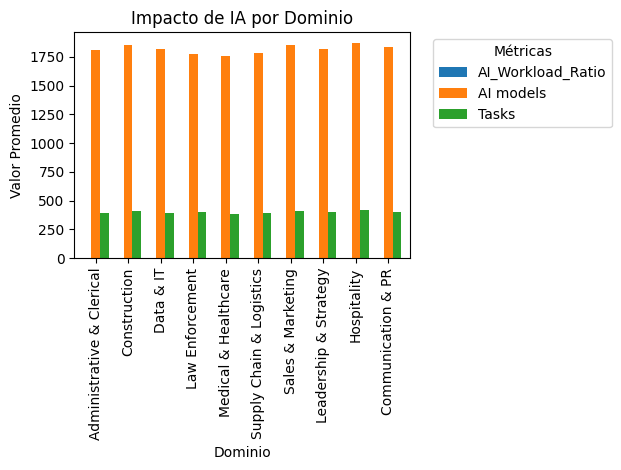

In [18]:
# Visualización de impacto por dominio
plt.figure(figsize=(12, 6))
# Gráfico de barras combinadas para mostrar múltiples métricas por dominio
domain_analysis.plot(kind='bar', width=0.8)
plt.title('Impacto de IA por Dominio')
plt.xlabel('Dominio')
plt.ylabel('Valor Promedio')
plt.legend(title='Métricas', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

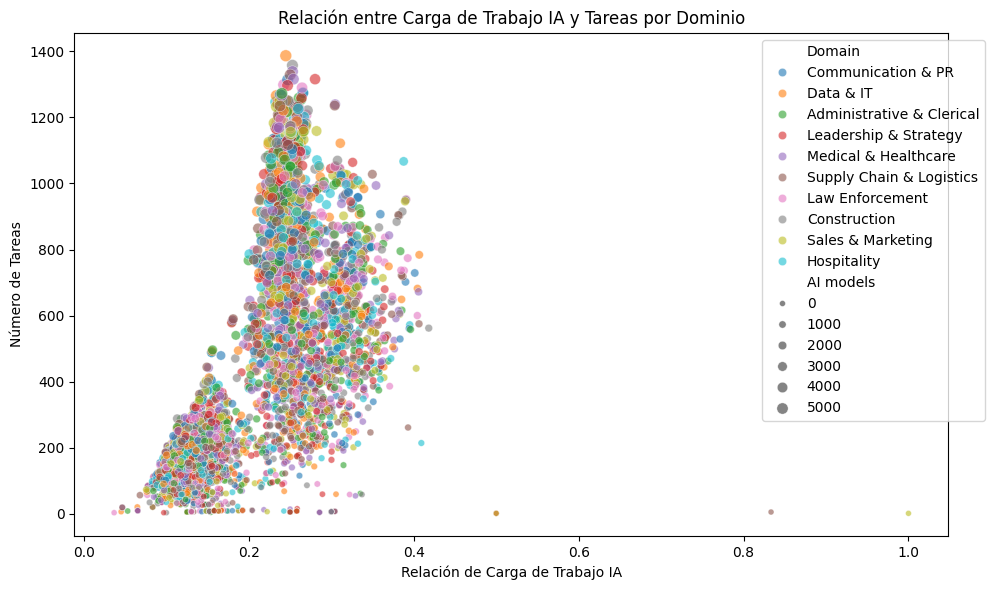

In [19]:
# scatter plot para roles
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfs["df4"], 
                x='AI_Workload_Ratio', 
                y='Tasks',
                hue='Domain',
                size='AI models',
                alpha=0.6)
plt.title('Relación entre Carga de Trabajo IA y Tareas por Dominio')
plt.xlabel('Relación de Carga de Trabajo IA')
plt.ylabel('Número de Tareas')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## Análisis por Dominio y Nivel Jerárquico
Del gráfico de barras de Impacto por Dominio:

- Se observa que todos los dominios tienen una alta proporción de modelos de IA (barras naranjas), lo que indica una amplia penetración de la tecnología
- Las tareas (barras verdes) se mantienen relativamente constantes entre dominios

Del gráfico por scatter plot para ver las relaciones de Trabajo Ia y de Dominio

- La carga de trabajo producido por la misma IA con el número de Tareas, con su eje x e y respectivamente
- En su distribución, la mayoría de las tareas tienen una carga de trabajo baja (menos de 0.4), con algo que varía, y como el número de tareas se puede notar que es entre las 200 a más de 1000, el general que se les dan.
- En su relación se observa que aumenta la carga de trabajo de IA, como de las tareas, pero no siempre. Existe una clara correlación positiva: a más tareas, mayor carga de trabajo IA
- Los colores representan diferentes áreas de trabajo (como salud, tecnología, etc.). Siendo que estas áreas están distribuidas en todo el gráfico, pero algunas pueden ser más comunes en ciertos rangos.
- Los puntos más grandes (que representan modelos más grandes de IA) aparecen más arriba en el gráfico, lo que sugiere que los modelos grandes se usan más para tareas con muchas operaciones.

#### 1.2 Análisis de susceptibilidad de factores de automatización

In [ ]:
# Correlación entre variables de impacto
# Sacamos la correlación de la carga de trabajo con la cantidad de modelos
correlation_matrix = dfs["df4"][['AI_Workload_Ratio', 'Tasks', 'AI models']].corr()
print("\nCorrelación entre factores de automatización:")
correlation_matrix


Correlación entre factores de automatización:


,AI_Workload_Ratio,Tasks,AI models
AI_Workload_Ratio,1.000000,0.631305,0.346893
Tasks,0.631305,1.000000,0.928350
AI models,0.346893,0.928350,1.000000


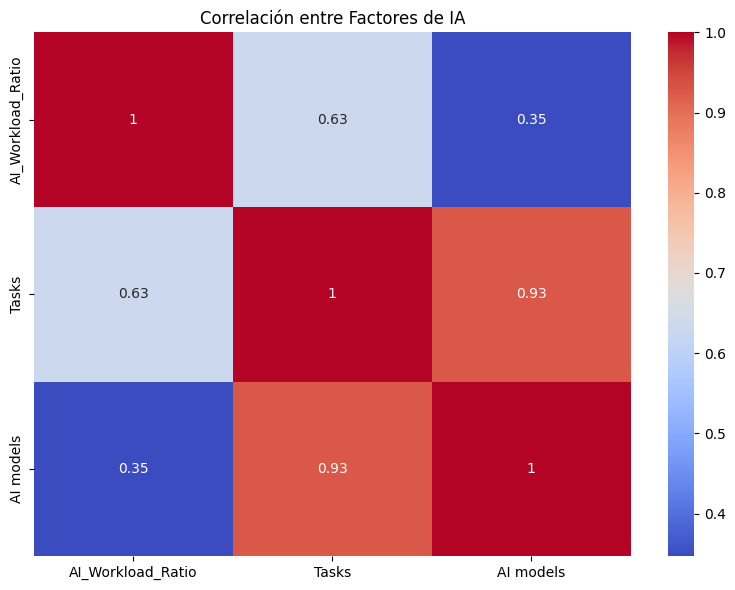

In [ ]:
# Correlación en impacto IA en heatmap
correlation_matrix = dfs["df4"][['AI_Workload_Ratio', 'Tasks', 'AI models']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Factores de IA')
plt.tight_layout()
plt.show()

## Análisis del heatmap de correlación:

- Alta correlación (0.93) entre Tasks y AI models, indicando que roles con más tareas tienden a implementar más modelos de IA
- Correlación moderada (0.63) entre Tasks y AI_Workload_Ratio
- Correlación más baja (0.35) entre AI_Workload_Ratio y AI models
- Sugiriendo que la cantidad de modelos no determina directamente la carga de trabajo automatizada

#### 1.3 Análisis de patrones en despidos

In [ ]:
# Momento de dato invalido que no deja hacer calculo
# En este apartado tuvimos que hacer una mini limpieza por el apartado de '#DIV/0!'
# Que es un dato que no ayuda para los calcuos que queremos sacar en nuestro patrones y en donde tuvimos que dejarlo como NaN
df_layoffs_clean = dfs["df5"].copy()

# Limpiar Percentage (reemplazar '#DIV/0!' por NaN)
df_layoffs_clean['Percentage'] = df_layoffs_clean['Percentage'].replace('#DIV/0!', np.nan)
df_layoffs_clean['Percentage'] = pd.to_numeric(df_layoffs_clean['Percentage'], errors='coerce')

# Limpiar Company_Size_before_Layoffs
df_layoffs_clean['Company_Size_before_Layoffs'] = df_layoffs_clean['Company_Size_before_Layoffs'].replace('#DIV/0!', np.nan)
df_layoffs_clean['Company_Size_before_Layoffs'] = pd.to_numeric(df_layoffs_clean['Company_Size_before_Layoffs'], errors='coerce')

# Laid_Off ya es numérico (float64) :D

# Apartado ayudado con ia, para sacar mejor esta parte

In [ ]:
# Análisis de dataframse con los patrones de despidos por Industrias para sacar
layoffs_by_industry = df_layoffs_clean.groupby('Industry').agg({
    'Laid_Off': 'sum',
    'Company_Size_before_Layoffs': 'mean',
    'Percentage': 'mean'
}).round(2).sort_values('Laid_Off', ascending=False)

print("\nPatrones de despidos por industria:")
layoffs_by_industry

# Igual se lo pedí mejor a la ia para que lo saque 


Patrones de despidos por industria:


,Laid_Off,Company_Size_before_Layoffs,Percentage
Industry,,,
Retail,119157.0,12822.18,23.75
Consumer,115735.0,6724.13,25.14
Other,86786.0,7153.52,17.77
Transportation,75231.0,3046.01,20.23
Finance,70054.0,1176.71,21.71
Food,68909.0,2697.04,27.14
Hardware,34025.0,26467.22,12.56
Real Estate,30382.0,1711.63,27.63
Healthcare,30092.0,857.77,28.13


In [ ]:
(df_layoffs_clean[['Laid_Off', 'Company_Size_before_Layoffs', 'Percentage']])

,Laid_Off,Company_Size_before_Layoffs,Percentage
0,20.0,50.0,NaN
1,8.0,80.0,NaN
2,6.0,8.0,NaN
3,16.0,16.0,NaN
4,130.0,591.0,NaN
...,...,...,...
3506,45.0,NaN,NaN
3507,15.0,45.0,33.0
3508,NaN,NaN,NaN
3509,NaN,NaN,100.0


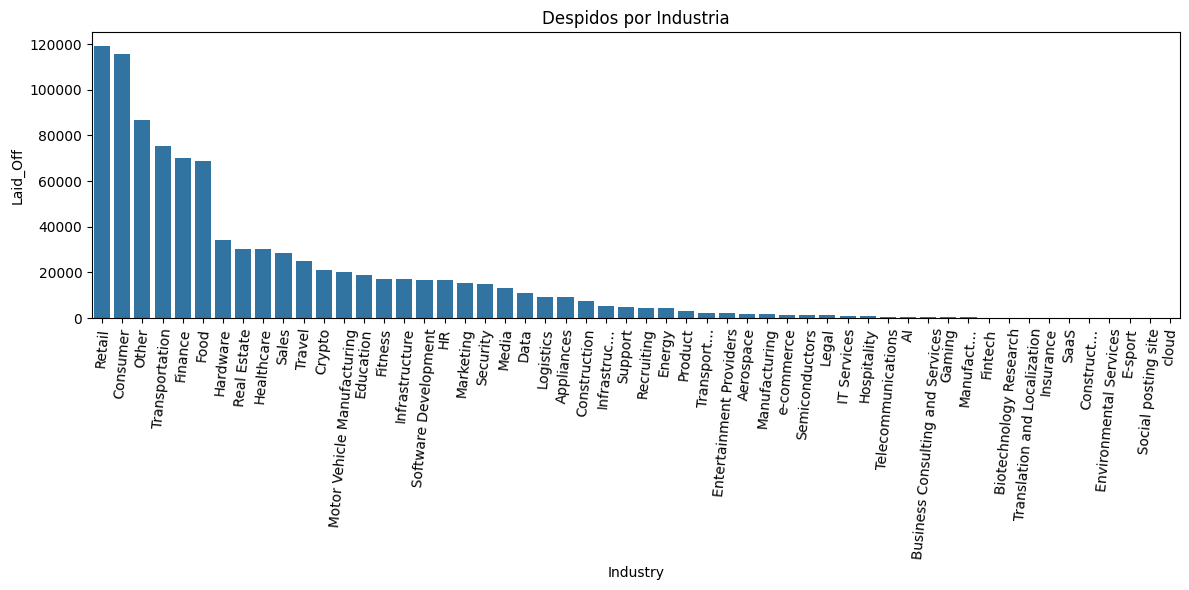

In [ ]:
# Grafico de barra de despidos por industria
plt.figure(figsize=(12, 6))
sns.barplot(x=layoffs_by_industry.index, 
           y=layoffs_by_industry['Laid_Off'])
plt.title('Despidos por Industria')
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

## Análisis del gráfico de Despidos por Industria:

- El sector Retail lidera significativamente en número de despidos
- Las industrias tecnológicas y de consumo siguen de cerca
- Hay una clara diferencia entre los sectores más afectados y los menos afectados

In [ ]:
# También podemos ver cuántos datos quedaron después de la limpieza
print("\nDatos no nulos después de la limpieza:")
print(df_layoffs_clean[['Laid_Off', 'Company_Size_before_Layoffs', 'Percentage']].count())


Datos no nulos después de la limpieza:
Laid_Off                       3242
Company_Size_before_Layoffs    3095
Percentage                     1570
dtype: int64


#### 1.4 Correlación con inversión en IA


In [ ]:
# Usando df2 (corporate-investment-in-artificial-intelligence-by-type.csv)
# Acá sacamos la tendencia de los años para ver lo invertido en IA
investment_trend = dfs["df2"].groupby('Year')['Global corporate investment in AI'].mean()
print("\nTendencia de inversión en IA por año:")
print(investment_trend)


Tendencia de inversión en IA por año:
Year
2013    6.778981e+09
2014    8.717324e+09
2015    1.162914e+10
2016    1.527321e+10
2017    2.375411e+10
2018    3.436722e+10
2019    4.378210e+10
2020    8.480107e+10
2021    1.349600e+11
2022    8.701627e+10
2023    6.728766e+10
Name: Global corporate investment in AI, dtype: float64


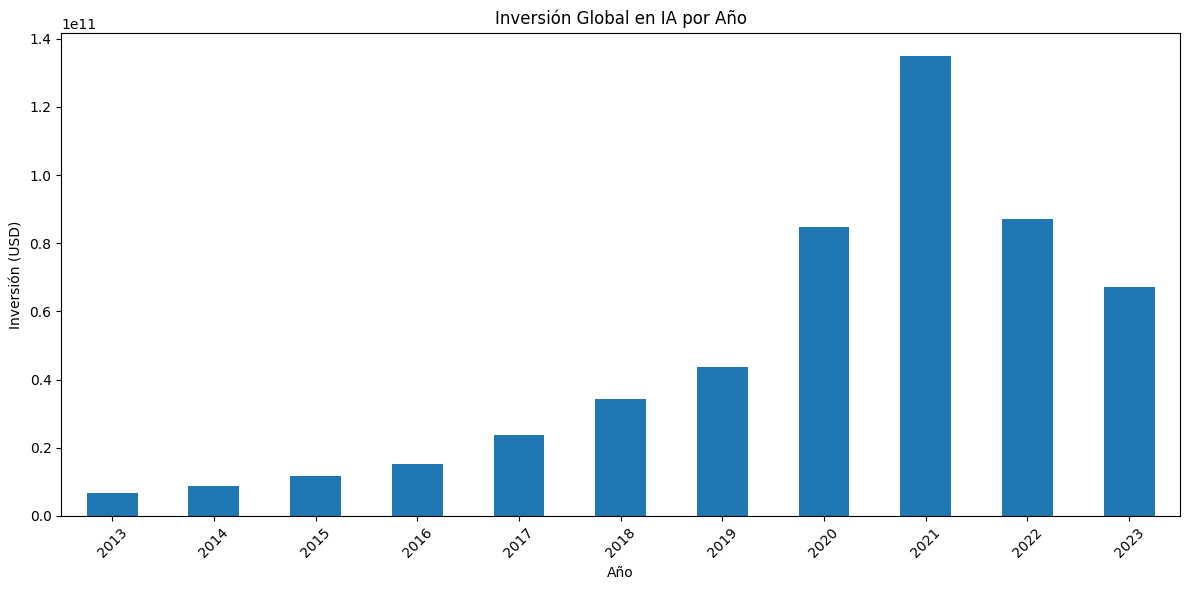

In [ ]:
# Grafico de barras con inversión en IA
plt.figure(figsize=(12, 6))
investment_trend.plot(kind='bar')
plt.title('Inversión Global en IA por Año')
plt.xlabel('Año')
plt.ylabel('Inversión (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Análisis del gráfico de Inversión Global:

- Crecimiento exponencial desde 2013 hasta 2021
- Hay una suma historica en el año 2021 (cerca de 135 mil millones USD)
- Y del declive luego deñ post-2021
- La tendencia muestra tres fases: crecimiento gradual (2013-2019), luego de aceleración (2019-2021), y luego de un ajuste de descrecimiento a comparación del año 2021 (2021-2023)

##### Conclusion:
Ahora a base de estos Análisis anteriores podemos responder a la pregunta en base que encontramos:

Desde la participacion en los roles es sumamente suscetible por los roles con más tareas repetitivas y estandarizadas
Posiciones en  donde los sectores son administrativos y de uso más tecnologico y con
trabajos con alto volumen de procesamiento de datos.
    
Esto debido a la fuerte correlación (0.93) entre el número de tareas y la implementación de modelos de IA
Los trabajos que requieren entre 20-40% de carga de trabajo IA son los más comunes y más a
la inversión de la IA que aumentó significativamente hasta 2021, permitiendo mayor automatización.

Con sectores como Retail, Consumer, Tech en donde muestran mayor reestructuración y se logra
la creación de un balance entre trabajo humano y automatización.
Y de igual manera a las ideas de las mismas empresas con sus ajustes, gracias al impacto de la IA con sus patrones de despidos

LLegando a concluir que se está creando un nuevo modelo donde la automatización y las personas trabajan juntas, y los roles cambian según cómo se adapten a la IA.

------------------------------